In [47]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import random
from scipy.spatial import KDTree

In [64]:
def bifurcation_plot(x_0, savepng = False):
    
    r = np.arange(2, 4, .001)
    
    plt.figure(figsize = (16,12))
    
    n = 40
    buckets = [[] for _ in range(len(r))]
    
    error = .0001
    
    for i in range(len(r)):
        x = x_0
        
        for j in range(700):
            x = r[i] * x * (1 - x)
        
        for j in range(n):
#             if x not in buckets[i]:
#                 buckets[i].append(x)
    
            if j == 0:
                buckets[i].append(x)
            
            elif not any(np.abs(buckets[i] - x) < error): # not any(x - error < buckets[i] and buckets[i] < x + error):
                buckets[i].append(x)
            
            x = r[i] * x * (1 - x)  
    
    
    
    colors = cm.get_cmap('twilight_shifted', n)
    # colors = cm.get_cmap('tab20', n)
    # colors = cm.get_cmap('hsv', n)
    
    # make a list of the r(x) and x(y) values to be plotted
    bf_x = []
    bf_r = []
    # index of lines
    bf_index = []
    
    # iterate through n, think of this as the number of lines being plotted:
        # at each value of n we will iterate through r:
            
            # if there are no x values in the bucket do nothing
            
            # if there are x values we need to check if they match up with the x values of a previous point (unless it is the first)
            
                # find the matching
            
                # once we have plotted an x value... how do we stop it from being replotted by accident?
    
    for r_i in range(len(r)):

        current_r = r[r_i]
        
        if r_i == 0:
            for x in range(len(buckets[r_i])):
                # print(f" ({current_r},{buckets[r_i][x]}) at index {r_i}")
                bf_x.append([buckets[r_i][x]])
                bf_r.append([current_r])
                bf_index.append([r_i])
            continue
        if True:
            if True:                 
    
                    #make a list of previous x values from lines
                    previous_x_list = []
                    previous_x_index = []
                    for index in range(len(bf_x)):
                        if bf_index[index][-1] == r_i-1: # or bf_index[index][-1] == r_i-2:
                            previous_x_list.append(bf_x[index][-1])
                            previous_x_index.append(index)
                    #make a list of current x values
                    current_x_list = buckets[r_i]
                    #sort both lists
                    # np.sort(previous_x_list)
                    current_x_list = np.sort(current_x_list) 
                    #print(r_i, current_x_list)

                    previous_line = -1
            
                    for x in current_x_list:
                        # find closest value (p) from previous to current_x (x)
                   
                        idx = (np.abs(previous_x_list - x)).argmin() 
                        p = previous_x_list[idx]
                        previous_index = previous_x_index[idx]
                        if previous_line == -1:
                            # Put x in p's line.
                            bf_x[previous_index].append(x)
                            bf_r[previous_index].append(current_r) 
                            bf_index[previous_index].append(r_i)
                            
                            previous_line = previous_index


                        else:
                            if previous_line == previous_index:
                                #make a new line, insert the previous_line's x,r and our x,r too.
                                bf_x.append([ p, x ])
                                bf_r.append([ r[r_i-1], current_r ])
                                bf_index.append([r_i-1, r_i])
                                #print(r_i,bf_x,bf_r,bf_index)
                            else:
                                previous_line = previous_index
                                bf_x[previous_index].append(x)
                                bf_r[previous_index].append(current_r) 
                                bf_index[previous_index].append(r_i)
                        


       #     else:
                
#                 l = len(bf_x)
#                 # make a list of previous_set filled with -1 = meaning they are not yet assigned
#                 previous_set = [-1 for x in range l]
#                 # make a list of current_set filled with False meaning they have not yet gotten paired
#                 current_set_parity = [False for x in range l]
#                 # make a list of current_set filled with empty lists - which is the folks that current_set has tried to pair with so far
#                 current_set_partners = [[ for x in l]]
                
#                 while there is something in current_set that isn't paired (we'll call these x)
#                     # find the lowest prev_set point to which current_set had never tried to pair (we'll call this p for previous)
                    
#                     #add p to x list
#                     if that p's entry is -1, it is free: change x's entry to True, change p's entry to x.
#                     else:
#                         # it means that some other x is assigned to p already, let's call it y
#                         if p has a smaller distance to x than to y
#                             # set p's entry to x
                            
#                             # change x's entry to True
                            
#                             # set y's entry to False

                        

                       
        
    for i in range(len(bf_x)):
        d = i % n
        plt.plot(bf_r[i], bf_x[i], c = colors(d/n), lw = .75) # marker="o" )
    
    
        
    
    # set y and x ticks
   # plt.xticks(np.linspace(3.6,3.7,11))
   # plt.yticks(np.linspace(0,1,11)) 
    plt.grid()

    plt.xlabel('r')
    plt.ylabel('x')
    
    plt.title("$x_0$ =" + str(x_0))
    
    if(savepng):
        plt.savefig("bifurcation_diagram_modified1.png")
    
    plt.show()

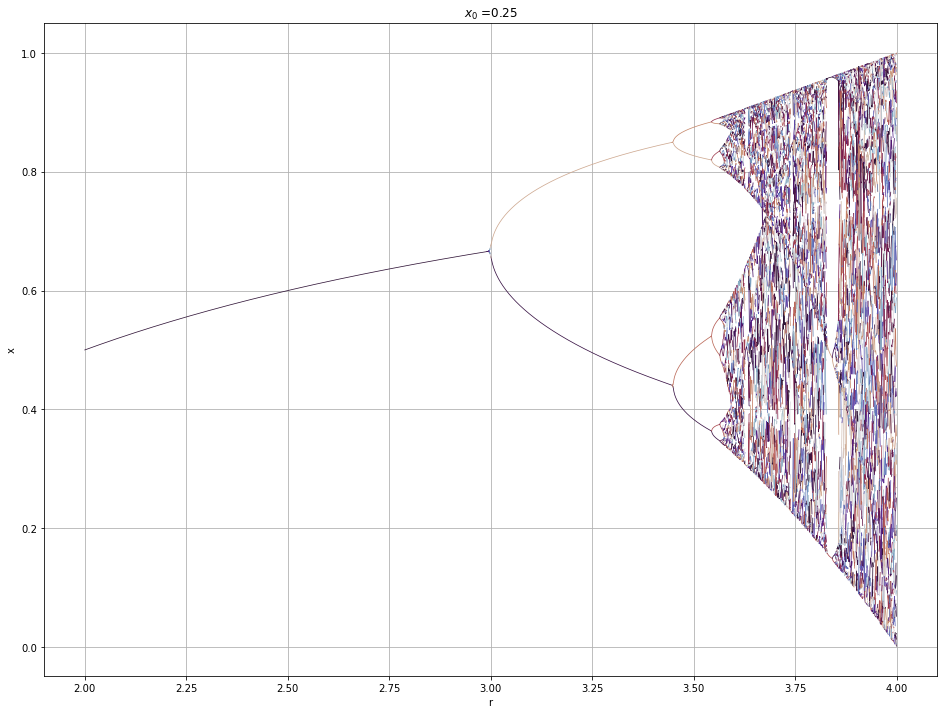

In [65]:
bifurcation_plot(.25, True)